### Fandango Ratings investigation

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after [Hickey's](https://fivethirtyeight.com/features/fandango-movies-ratings/) analysis.

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

-- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.

-- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.

-- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.
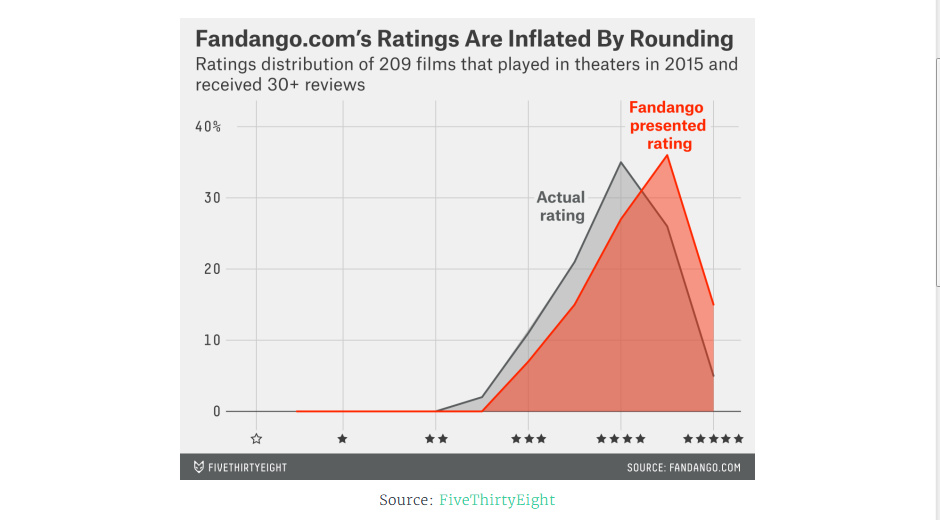

Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

### Fandango data columns
This data contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.
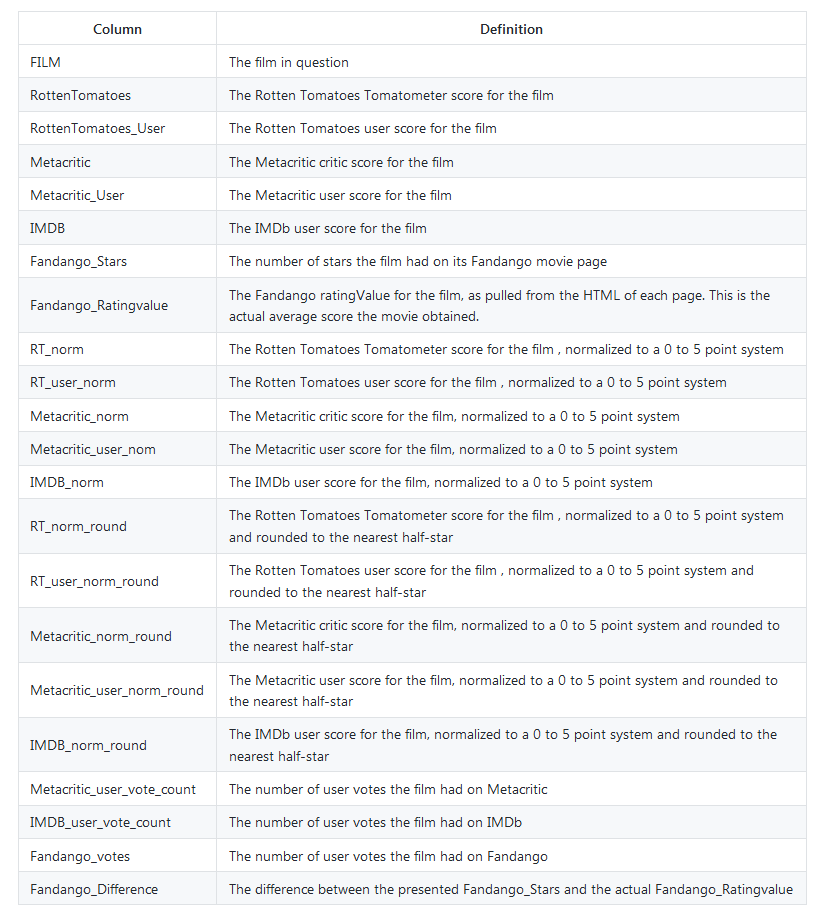

### Movie Ratings columns
This data contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. 
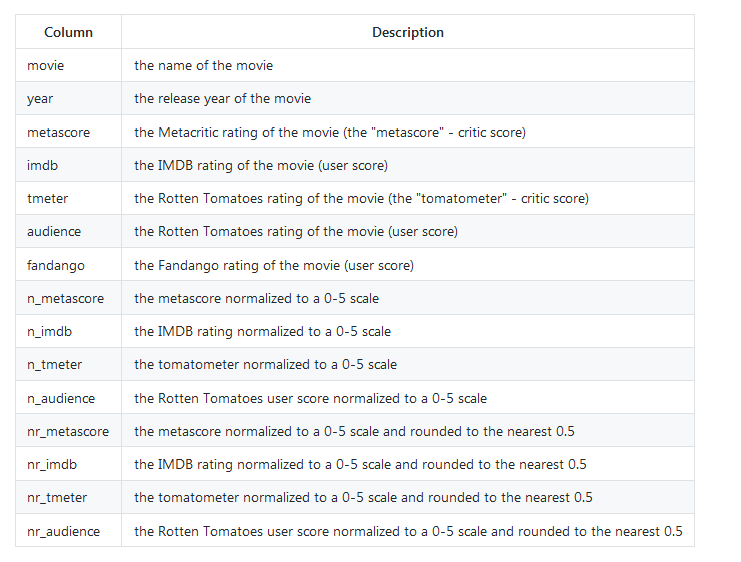

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100  # Avoid having displayed truncated output
fandango = pd.read_csv("fandango_score_comparison.csv")
movies = pd.read_csv("movie_ratings_16_17.csv")

In [12]:
fandango.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [13]:
movies.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [15]:
# Selecting just the ones for the analysis
fandango = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
movies = movies[[ 'movie', 'year', 'fandango']].copy()

In [16]:
fandango.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [17]:
movies.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


### Sampling method
The sampling method used according to the pulled down data is selective/subjective to the analyisis. 

For fandango data the data was taken based on a date and on movies with at least 30 fan reviews so no all movies had the equal chance to be sampled.

For movies data, this was also sampled according to the most popular reviews, so not all movies had the chance to be sampled.

### Changing the object of our study
As we dont have representative data, we need to twick the question of our analysis and work with the data that we have. Instead of asking if there is any difference between the Fandango ratings before and now, we would like to know if there is any difference of Fandango ratings for popular movies in 2015 and polupar movies in 2016.

With the new goal, we now have two populations that we want to describe and compare with each other:

    All Fandango's ratings for popular movies released in 2015.
    All Fandango's ratings for popular movies released in 2016.

### Checking our data for popular movies
Will check if indeed the sample contains popular movies (more than 30 user reviews, votes)

In [21]:
fandango[fandango.Fandango_votes < 30].sum()

FILM                    0.0
Fandango_Stars          0.0
Fandango_Ratingvalue    0.0
Fandango_votes          0.0
Fandango_Difference     0.0
dtype: float64

### Isolating the data set
As we need the data from movies released only in 2015 and 2016 we need to extract those from our data

In [36]:
f2015 = fandango[fandango.FILM.str.extract(r'([2][0][1][5])', expand = None).notnull()].copy()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [46]:
f2016 = movies[movies.year == 2016].copy()

### Making frequency ditributions

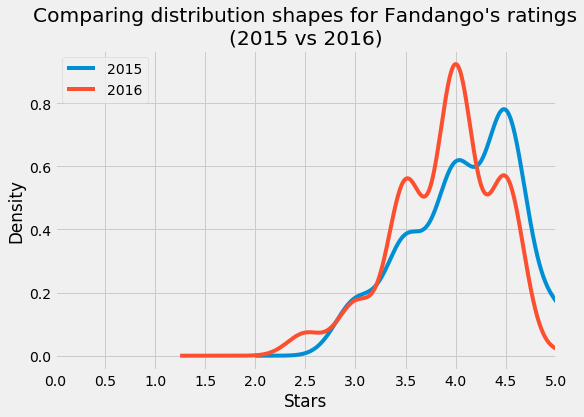

In [53]:
from numpy import arange
f2015.Fandango_Stars.plot.kde(label = '2015', legend = True, figsize = (8,5.5))
f2016.fandango.plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.001) # the `y` parameter pads the title upwards
plt.style.use('fivethirtyeight')
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,0.5))
plt.show()

Indeed there is a difference on ratings from 2015 to 2016 most popular movies, although they are both left skew meaning hight ratings given by Fandango. The rating in 2016 has moved to the left by aprox 0.5

In [54]:
import sympy as S

### Sumary statistics

In [61]:
sume = pd.DataFrame()
sume["2015"] = [f2015.Fandango_Stars.mean(),f2015.Fandango_Stars.median(),f2015.Fandango_Stars.mode()[0]]
sume["2016"] = [f2016.fandango.mean(),f2016.fandango.median(),f2016.fandango.mode()[0]]

In [76]:
sume.index = ["Mean","Median", "Mode"]
sume.head()

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


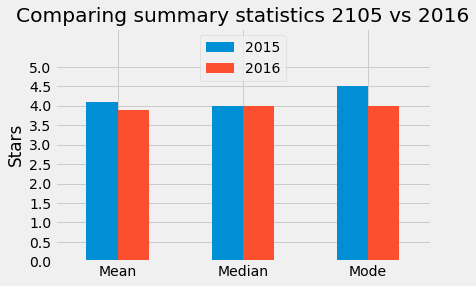

In [80]:
plt.style.use('fivethirtyeight')
sume.plot.bar(align = "center", rot = 0)
plt.title("Comparing summary statistics 2105 vs 2016")
plt.ylim(0,6)
plt.yticks(arange(0,5.1,0.5))
plt.ylabel("Stars")
plt.legend(loc = "upper center")
plt.show()

Based on this, we confirm that the mean of 2015 movies were rated slighly highly than the mean of the movies on 2016. The Median is the same and the Mode is high by 0.5 than the Mode of 2016 movies.

### Conclusion
Based on our analysis, we conclude that efectively the ratings for movies in 2015 were slightly high than the ratings for movies in 2016. We dont have data to know why this is the case our hypotesis is that Fandango weighted the data to be slightly more favorable on movies rating.